# Práctica 5

In [1]:
import sys

sys.path.append("..")

import numpy as np
import pandas as pd
from AI_algorithms.ml.supervised.bayesian import GaussianNB

Considere el siguiente conjunto de datos. Los atributos $x_i$ son atributos binarios y el atributo $C$ es un atributo de clase que puede tomar tres posibles valores $\{a, b, c\}$.

$$
\begin{array}{|c||c|c|c||c|}
\hline
 & x_1 & x_2 & x_3 &  C \\
\hline
1 & 0 & 1 & 1 &  c \\
2 & 1 & 0 & 1 &  a \\
3 & 1 & 1 & 0 &  b \\
4 & 0 & 0 & 0 &  a \\
5 & 0 & 0 & 1 &  b \\
6 & 1 & 0 & 1 &  a \\
7 & 1 & 1 & 0 &  b \\
8 & 0 & 0 & 0 &  c \\
\hline
\end{array}
$$

In [2]:
X = [[0,1,1],
     [1,0,1],
     [1,1,0],
     [0,0,0],
     [0,0,1],
     [1,0,1],
     [1,1,0],
     [0,0,0]]

y = ['c','a','b','a','b','a','b','c']

X = np.array(X)
y = np.array(y)

print("X shape: ", X.shape)
print("y shape: ", y.shape)

X shape:  (8, 3)
y shape:  (8,)


## Ejercicio 1

Calcule las probabilidades condicionales necesarias para un modelo naïve Bayes.

In [3]:
model = GaussianNB()
model.fit(X, y, discrete=[0,1,2])

priors = model.priors
discrete_conditional_likelihood = model.discrete_probs
probs = {}
counts_ = {}
for i,c in enumerate(model.classes):
    class_probs = {}
    counts = {}
    class_probs[f'P( C = c_i )'] = priors[i]
    counts['c = c_i'] = priors[i] * X.shape[0]
    for j,feature in enumerate(model.features):
        for value, prob in discrete_conditional_likelihood[(i,j)].items():
            class_probs[f'P( x{j+1} = {value} | C = c_i )'] = prob
            counts[f'x{j+1} = {value} and c = c_i'] = ((y == c) & (X[:,j]==value)).sum()
    counts_[c] = counts
    probs[c] = class_probs

      
counts = pd.DataFrame(counts_).astype(int)
probs = pd.DataFrame(probs).round(3)

In [4]:
print(f'Probabilities needed to calculate P(C|X):')
probs

Probabilities needed to calculate P(C|X):


,a,b,c
P( C = c_i ),0.375,0.375,0.25
P( x1 = 0 | C = c_i ),0.333,0.333,1.00
P( x1 = 1 | C = c_i ),0.667,0.667,0.00
P( x2 = 1 | C = c_i ),0.000,0.667,0.50
P( x2 = 0 | C = c_i ),1.000,0.333,0.50
P( x3 = 1 | C = c_i ),0.667,0.333,0.50
P( x3 = 0 | C = c_i ),0.333,0.667,0.50


In [5]:
print(f'Count values for each combination - dependency')
counts

Count values for each combination - dependency


,a,b,c
c = c_i,3,3,2
x1 = 0 and c = c_i,1,1,2
x1 = 1 and c = c_i,2,2,0
x2 = 1 and c = c_i,0,2,1
x2 = 0 and c = c_i,3,1,1
x3 = 1 and c = c_i,2,1,1
x3 = 0 and c = c_i,1,2,1


## Ejercicio 2

Clasifique el ejemplo $x = (0, 0, 1)$

In [6]:
sample = np.array([0,0,1])
probs = model.predict_proba(sample).flatten()
class_ = model.predict(sample)
print(f'Probabilities of each class given the sample:\n')
s = 0
for i,c in enumerate(model.classes):
    s += probs[i]
    print(f'P( C = {c} | X = ({", ".join(sample.astype(str))}) ) = {probs[i]:.3f}')

assert np.isclose(s, 1.0), f'Probabilities do not sum to 1: {s}'
print(f'\nPredicted class for the sample: {class_[0]}')

Probabilities of each class given the sample:

P( C = a | X = (0, 0, 1) ) = 0.522
P( C = b | X = (0, 0, 1) ) = 0.087
P( C = c | X = (0, 0, 1) ) = 0.391

Predicted class for the sample: a


## Ejercicio 3



Calcule la siguiente probabilidad de manera exacta: $P(C = a|x = (1, 1, 0))$

In [7]:
sample = np.array([1,1,0])
probs = model.predict_proba(sample).flatten()
target_class = 'a'

index = np.where(model.classes == target_class)[0][0]
value = probs[index]
print(f'P( C = {target_class} | X = ({", ".join(sample.astype(str))}) ) = {value}')

P( C = a | X = (1, 1, 0) ) = 0.0


In [8]:
model = GaussianNB()
model.fit(X, y, discrete=[0,1,2], correction = 'laplace')
sample = np.array([1,1,0])
probs = model.predict_proba(sample).flatten()
target_class = 'a'

index = np.where(model.classes == target_class)[0][0]
value = probs[index]
print('Scenario with Laplace correction:\n')
print(f'P( C = {target_class} | X = ({", ".join(sample.astype(str))}) ) = {value:.5f}')

Scenario with Laplace correction:

P( C = a | X = (1, 1, 0) ) = 0.15703


In [9]:
model = GaussianNB()
m = 1
model.fit(X, y, discrete=[0,1,2], correction = 'm-estimate', m=m)
sample = np.array([1,1,0])
probs = model.predict_proba(sample).flatten()
target_class = 'a'

index = np.where(model.classes == target_class)[0][0]
value = probs[index]
print(f'Scenario with m-estimate and m={m}:\n')
print(f'P( C = {target_class} | X = ({", ".join(sample.astype(str))}) ) = {value:.5f}')

Scenario with m-estimate and m=1:

P( C = a | X = (1, 1, 0) ) = 0.08036


## Región de decisión del modelo Bayesiano

In [10]:
import sys

sys.path.append('..')

from AI_algorithms.utils.plot import plot_data , plot_decision_region
from sklearn.metrics import classification_report
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import minmax_scale
import numpy as np

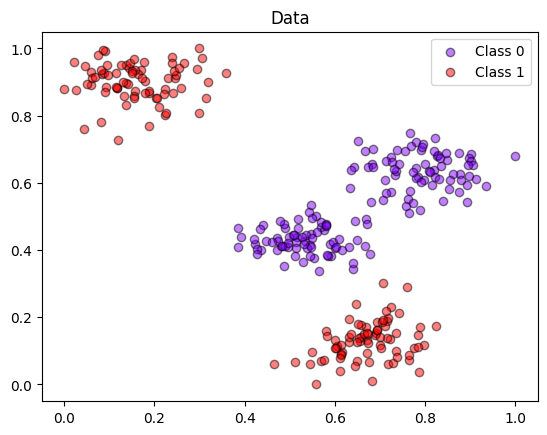

In [11]:
X, y = make_blobs(n_samples=300, n_features=2, centers=4, random_state=109)
X = minmax_scale(X)
y = y % 2
plot_data(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [12]:
model = GaussianNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        31

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



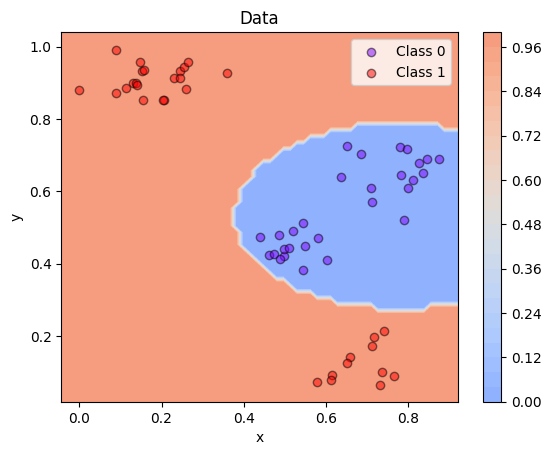

In [13]:
plot_decision_region(X_test, lambda x1,x2: model.predict(np.array([x1,x2]).reshape(1,-1)), vmin=-.5, vmax=1.5)
plot_data(X_test, y_test)